# DS CHALLENGE

## EXERCICE 4

### PROBLEM STATEMENT

#### Match searches with bookings

- For every search in the searches file, find out whether the search ended up in a booking or not (using the info in the bookings file). For instance, search and booking origin and destination should match. 

- For the bookings file, origin and destination are the columns dep_port and arr_port, respectively. 

- Generate a CSV file with the search data, and an additional field, containing 1 if the search ended up in a booking, and 0 otherwise.


### PROBLEM SOLUTION

In order to solve the problem, the folling approach is consdered:


1. We will work with the files with no duplicates (reduced version of them) and only 'Date', 'Destination', and 'Origin' for searches.csv, and 'cre_date', 'dep_port', and 'arr_port' for booking.csv.


2. Cleaning and matching formats in both dataframes is very important for future comparison between them.


3. Remove duplicates from bookings.csv file, in order to consider only once the information in searches.csv.


4. Merging both dataframes by date, origin and destination


5. The approach will be the same as the previous ones, first with a small sample of data, then with the entire files.

### 1. MAIN OVERVIEW

In [9]:
import pandas as pd

In [10]:
searches_path = '/home/dsc/Data/challenge/searches_no_dups.csv'

searches = pd.read_csv(searches_path,
                             delimiter='^',
                             #chunksize=10000,
                             #nrows=100000
                             #usecols=['Date','Origin','Destination'],
                             na_values=0)

/home/dsc/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (41,42,43,45) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [11]:
searches.shape

(359004, 46)

In [13]:
searches.columns

Index(['Unnamed: 0', 'Date', 'Time', 'TxnCode', 'OfficeID', 'Country',
       'Origin', 'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure',
       'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode',
       'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier',
       'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
       'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival',
       'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure',
       'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode',
       'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier',
       'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet',
       'IsFromVista', 'TerminalID', 'InternetOffice'],
      dtype='object')

In [15]:
searches.drop('Unnamed: 0',axis=1,inplace=True)

In [18]:
pd.options.display.max_columns = None #To see all the columns

In [19]:
searches.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1.0,2.0,TXL,AUH,2013-01-26,D2,NaN,AUH,TXL,2013-02-02,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,NaN,NaN,NaN,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,NaN,1.0,ATH,MIL,2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,NaN,NaN,NaN,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1.0,2.0,ICT,SFO,2013-08-02,NaN,NaN,SFO,ICT,2013-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,NaN,NaN,NaN,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,NaN,1.0,RNB,ARN,2013-01-02,DU,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,NaN,NaN,NaN,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1.0,2.0,OSL,MAD,2013-03-22,NaN,NaN,MAD,OSL,2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,NaN,NaN,NaN,d41d8cd98f00b204e9800998ecf8427e,OSL


In [20]:
searches.tail()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
358999,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1.0,2.0,TXL,AUH,2013-01-26,D2,NaN,AUH,TXL,2013-02-02,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,NaN,NaN,NaN,d41d8cd98f00b204e9800998ecf8427e,FRA,NaN,NaN,NaN
359000,"2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5c...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
359001,2013-01-01,18:04:49,MPT,3561,US,ICT,SFO,1.0,2.0,ICT,SFO,2013-08-02,NaN,NaN,SFO,ICT,2013-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,NaN,NaN,NaN,d41d8cd98f00b204e9800998ecf8427e,NYC
359002,2013-01-01,19:57:57,MPT,28d7a8c95e4db88589d3d35b66920e78,DE,FRA,BGW,1.0,2.0,FRA,BGW,2013-02-26,NaN,NaN,BGW,FRA,2013-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,NaN,NaN,NaN,d41d8cd98f00b204e9800998ecf8427e,BNJ,NaN,NaN
359003,2013-10-13,18:57:54,MTP,e41c9d833aa74600552f2ed688b67d81,AT,VIE,HA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
booking_path = '/home/dsc/Data/challenge/bookings_no_dups.csv'

bookings = pd.read_csv(booking_path,
                       delimiter='^',
                       #chunksize=10000,
                       #nrows=100000,
                       usecols=['cre_date','dep_port','arr_port','pax'],
                       na_values=0)

In [23]:
bookings.shape

(1000003, 4)

As the dataframes are not huge, I decide to work with them as they are (not considering a sample and then the hole data).

### 2. SOLUTION

In [25]:
searches.columns

Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin',
       'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure',
       'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode',
       'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier',
       'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
       'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival',
       'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure',
       'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode',
       'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier',
       'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet',
       'IsFromVista', 'TerminalID', 'InternetOffice'],
      dtype='object')

In [26]:
bookings.head()

,cre_date,dep_port,arr_port,pax
0,2013-02-22 00:00:00,ZRH,LHR,-1.0
1,2013-03-26 00:00:00,SAL,CLT,1.0
2,2013-03-26 00:00:00,SAL,CLT,1.0
3,2013-03-26 00:00:00,AKL,SVO,1.0
4,2013-03-26 00:00:00,AKL,SVO,1.0


In [27]:
bookings.columns

Index(['cre_date', 'dep_port', 'arr_port', 'pax'], dtype='object')

In [28]:
bookings.dtypes

cre_date     object
dep_port     object
arr_port     object
pax         float64
dtype: object

In [29]:
#Let us consider only the date of the bookings
bookings['cre_date'] = bookings['cre_date'].str[0:10]

In [30]:
bookings.head()

,cre_date,dep_port,arr_port,pax
0,2013-02-22,ZRH,LHR,-1.0
1,2013-03-26,SAL,CLT,1.0
2,2013-03-26,SAL,CLT,1.0
3,2013-03-26,AKL,SVO,1.0
4,2013-03-26,AKL,SVO,1.0


In [31]:
#Now we are going to consider only the real bookings, dropping the cancellations
bookings = bookings[bookings['pax'] >= 0]
bookings.head()

,cre_date,dep_port,arr_port,pax
1,2013-03-26,SAL,CLT,1.0
2,2013-03-26,SAL,CLT,1.0
3,2013-03-26,AKL,SVO,1.0
4,2013-03-26,AKL,SVO,1.0
5,2013-03-20,DEN,LGA,1.0


In [32]:
bookings.shape

(680868, 4)

In [33]:
bookings.describe()

,pax
count,680868.000000
mean,1.476536
std,1.547879
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,99.000000


In [35]:
#Just for curiosity
bookings[bookings['pax']<=2].size

2487412

In [37]:
#Now, we include the same column names as searches (to merge properly the dataframes in the next steps.
bookings.columns = ['Date', 'Origin', 'Destination','pax']
bookings.head()

,Date,Origin,Destination,pax
1,2013-03-26,SAL,CLT,1.0
2,2013-03-26,SAL,CLT,1.0
3,2013-03-26,AKL,SVO,1.0
4,2013-03-26,AKL,SVO,1.0
5,2013-03-20,DEN,LGA,1.0


In [38]:
import seaborn as sns

<AxesSubplot:>

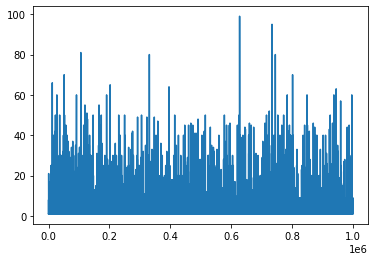

In [39]:
bookings['pax'].plot(kind='line')

#### Now we are going to investigate searches dataframe to see if there are problems in formats or values.

In [40]:
searches.dtypes

Date                  object
Time                  object
TxnCode               object
OfficeID              object
Country               object
Origin                object
Destination           object
RoundTrip            float64
NbSegments           float64
Seg1Departure         object
Seg1Arrival           object
Seg1Date              object
Seg1Carrier           object
Seg1BookingCode       object
Seg2Departure         object
Seg2Arrival           object
Seg2Date              object
Seg2Carrier           object
Seg2BookingCode       object
Seg3Departure         object
Seg3Arrival           object
Seg3Date              object
Seg3Carrier           object
Seg3BookingCode       object
Seg4Departure         object
Seg4Arrival           object
Seg4Date              object
Seg4Carrier           object
Seg4BookingCode       object
Seg5Departure         object
Seg5Arrival           object
Seg5Date              object
Seg5Carrier           object
Seg5BookingCode       object
Seg6Departure 

Now, we find out a bit more about the lenth of the strings (crucial to merge the dataframes).

In [41]:
searches['Origin'].str.len().describe()

count    359003.0
mean          3.0
std           0.0
min           3.0
25%           3.0
50%           3.0
75%           3.0
max           3.0
Name: Origin, dtype: float64

In [42]:
searches['Destination'].str.len().describe()

count    359003.000000
mean          2.999997
std           0.001669
min           2.000000
25%           3.000000
50%           3.000000
75%           3.000000
max           3.000000
Name: Destination, dtype: float64

In [44]:
#Let us upper all the fieds to be sure we will merge case insensitive
searches['Origin'] = searches['Origin'].str.upper()
searches['Destination'] = searches['Destination'].str.upper()

We found some problems in 'Destination' column of searches. Let us investigate a bit more and then decide what to do with the rowns with only 2 characters.

In [45]:
searches[searches['Destination'].str.len()==2]

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
359003,2013-10-13,18:57:54,MTP,e41c9d833aa74600552f2ed688b67d81,AT,VIE,HA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
searches[searches['Destination'].str.len()==2].index

Int64Index([359003], dtype='int64')

Is possible that 'HA' is equal to ' HA'? We try to find somethin in booking or searches. If not possible, then we will drop the row, as it is considered an error.

In [47]:
searches[(searches['Destination'] ==' HA') | (searches['Origin'] ==' HA')]

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice


Now we try to see if we can figure out what 'HA' can be. But, before it, we will investigate a bit NaN (only in the columns we are interested in).

In [49]:
searches_columns_merge = ['Date','Origin','Destination']
searches[searches_columns_merge].notnull().all()

Date            True
Origin         False
Destination    False
dtype: bool

In [52]:
searches[searches['Origin'].isnull()]

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
359000,"2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5c...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
searches[searches['Destination'].isnull()]

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
359000,"2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5c...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
#We have found that row 359000 has a problem: all the values are in the first column, separated by ','
searches['Date'].iloc[359000]

'2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,,,,,,,,,,,,,,,,,,,,,,,,,,,,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV'

In [56]:
searches_359000_list = searches['Date'].iloc[359000].split(',')
searches_359000_list

['2013-01-01',
 '10:15:33',
 'MPT',
 'b0af35b31588dc4ab06d5cf2986e8e02',
 'MD',
 'ATH',
 'MIL',
 '0',
 '1',
 'ATH',
 'MIL',
 '2013-01-04',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '1ASIWS',
 '0',
 '0',
 '0',
 'd41d8cd98f00b204e9800998ecf8427e',
 'KIV']

In [57]:
searches.iloc[[359000]] = searches_359000_list

In [58]:
searches.iloc[[359000]]

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
359000,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,,,,,,,,,,,,,,,,,,,,,,,,,,,,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV


In [63]:
#Now, we replace NaN with 0
searches.fillna(value=0,inplace=True)

In [64]:
#Now, there is no NaN in the dataframe
searches.notnull().all()

Date                 True
Time                 True
TxnCode              True
OfficeID             True
Country              True
Origin               True
Destination          True
RoundTrip            True
NbSegments           True
Seg1Departure        True
Seg1Arrival          True
Seg1Date             True
Seg1Carrier          True
Seg1BookingCode      True
Seg2Departure        True
Seg2Arrival          True
Seg2Date             True
Seg2Carrier          True
Seg2BookingCode      True
Seg3Departure        True
Seg3Arrival          True
Seg3Date             True
Seg3Carrier          True
Seg3BookingCode      True
Seg4Departure        True
Seg4Arrival          True
Seg4Date             True
Seg4Carrier          True
Seg4BookingCode      True
Seg5Departure        True
Seg5Arrival          True
Seg5Date             True
Seg5Carrier          True
Seg5BookingCode      True
Seg6Departure        True
Seg6Arrival          True
Seg6Date             True
Seg6Carrier          True
Seg6BookingC

In [78]:
#Let us continue with the 'HA' issue.
searches_subgroup = searches[['Origin','Destination']]
searches_subgroup.head()
searches_subgroup[searches_subgroup['Destination'].str.contains('HA')].value_counts()

Origin  Destination
MUC     HAM            181
FRA     HAM             88
STR     HAM             84
VIE     HAM             79
ZRH     HAM             64
                      ... 
RIX     SHA              1
RMF     HAM              1
ICT     SHA              1
        HAM              1
LLA     HAD              1
Length: 1022, dtype: int64

In [81]:
searches_subgroup[searches_subgroup['Destination'].str.contains('HA')].value_counts().shape

(1022,)

In [82]:
type(searches_subgroup[searches_subgroup['Destination'].str.contains('HA')].value_counts())

pandas.core.series.Series

In [83]:
vc = searches_subgroup[searches_subgroup['Destination'].str.contains('HA')].value_counts()

In [85]:
vc.reset_index()['Destination'].value_counts()

HAM    287
SHA    183
HAJ    178
HAN    140
HAV    125
HAU     23
NHA     18
HAK     18
CHA     18
HAR     13
HAS      5
HAH      5
HAD      5
ZHA      2
HA       1
HAQ      1
Name: Destination, dtype: int64

In [79]:
#As we can see, there are lots of different combinations with 'HA', so it is changed to 'HA_',
#just to be sure mergins is working.

searches['Destination'].iloc[[359003]] = 'HA_'

In [80]:
searches.shape

(359004, 45)

In [86]:
searches['Destination'].iloc[[359003]]

359003    HA_
Name: Destination, dtype: object

In [87]:
searches['Destination'].str.len().describe()

count    359004.0
mean          3.0
std           0.0
min           3.0
25%           3.0
50%           3.0
75%           3.0
max           3.0
Name: Destination, dtype: float64

#### Now we are going to investigate bookings dataframe to see if there are problems in formats or values.

In [259]:
bookings['Origin'].str.len().describe()

count    680868.0
mean          8.0
std           0.0
min           8.0
25%           8.0
50%           8.0
75%           8.0
max           8.0
Name: Origin, dtype: float64

In [260]:
bookings['Destination'].str.len().describe()

count    680868.0
mean          8.0
std           0.0
min           8.0
25%           8.0
50%           8.0
75%           8.0
max           8.0
Name: Destination, dtype: float64

In [89]:
#Let us delete the spaces and upper

bookings['Origin'] = bookings['Origin'].str.strip()
bookings['Destination'] = bookings['Destination'].str.strip()

In [90]:
bookings['Origin'] = bookings['Origin'].str.upper()
bookings['Destination'] = bookings['Destination'].str.upper()

In [91]:
bookings['Origin'].str.len().describe()

count    680868.0
mean          3.0
std           0.0
min           3.0
25%           3.0
50%           3.0
75%           3.0
max           3.0
Name: Origin, dtype: float64

In [92]:
bookings['Destination'].str.len().describe()

count    680868.0
mean          3.0
std           0.0
min           3.0
25%           3.0
50%           3.0
75%           3.0
max           3.0
Name: Destination, dtype: float64

In [93]:
#Now, we are going to find NaN

bookings.isnull().any()

Date           False
Origin         False
Destination    False
pax            False
dtype: bool

In [94]:
#There is no NaN, so we can continue by dropping dupplicates in booking

bookings_nodups = bookings.drop_duplicates()

In [95]:
bookings_nodups.shape

(325479, 4)

Now we delete 'pax' column: since it is possible that date, origin, and destination are equal, but not pax, the future mergin between serching and bookings can have problem and create duplicates.

In [107]:
bookings_nodups.drop('pax',axis=1,inplace=True)

In [108]:
bookings_nodups.columns

Index(['Date', 'Origin', 'Destination'], dtype='object')

In [109]:
bookings_nodups = bookings_nodups.drop_duplicates()

In [110]:
bookings_nodups.shape

(315574, 3)

We can see how the number or rows in bookings has been reduced.

In [111]:
#Now we will include a "Booking" column in "bookings_nodups" with 1 in all the fields, to be sure that if there
#is matching with searches a 1 is there.

bookings_nodups['Booking'] = 1

In [112]:
bookings_nodups.shape

(315574, 4)

In [113]:
bookings_nodups.head()

,Date,Origin,Destination,Booking
1,2013-03-26,SAL,CLT,1
3,2013-03-26,AKL,SVO,1
5,2013-03-20,DEN,LGA,1
7,2013-03-25,NRT,SIN,1
19,2013-03-13,YYZ,TUS,1


#### Now we are going to investigate bookings dataframe to see if there are problems in formats or values.

In [328]:
df1 = pd.DataFrame({
                    'data' : list('111'),
                    'key' : list('aab')
                    })

df2 = pd.DataFrame({
                  'data' : list('11'),
                  'key' : list('ab'),
                  'data2' : list('36')
                    })

In [329]:
df1

,data,key
0,1,a
1,1,a
2,1,b


In [330]:
df2

,data,key,data2
0,1,a,3
1,1,b,6


In [331]:
df1.merge(df2,how='left')

,data,key,data2
0,1,a,3
1,1,a,3
2,1,b,6


In [114]:
merging = searches.merge(bookings_nodups,how='left')
merging

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice,Booking
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,AUH,2013-01-26,D2,0,AUH,TXL,2013-02-02,D2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA,NaN
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV,NaN
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,SFO,2013-08-02,0,0,SFO,ICT,2013-08-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC,NaN
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,ARN,2013-01-02,DU,W,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO,NaN
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,MAD,2013-03-22,0,0,MAD,OSL,2013-03-31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358999,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,AUH,2013-01-26,D2,0,AUH,TXL,2013-02-02,D2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA,0,0,0,NaN
359000,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,,,,,,,,,,,,,,,,,,,,,,,,,,,,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV,NaN
359001,2013-01-01,18:04:49,MPT,3561,US,ICT,SFO,1,2,ICT,SFO,2013-08-02,0,0,SFO,ICT,2013-08-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC,NaN
359002,2013-01-01,19:57:57,MPT,28d7a8c95e4db88589d3d35b66920e78,DE,FRA,BGW,1,2,FRA,BGW,2013-02-26,0,0,BGW,FRA,2013-04-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BNJ,0,0,NaN


In [115]:
#Now, we can be sure that merging is OK, since all the searches rows has only one Booking column
len(searches) - len(merging)

0

In [116]:
#Now, we substitute NaN with 0 to complet the Booking column
merging.fillna(value=0,inplace=True)

In [117]:
merging.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice,Booking
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,AUH,2013-01-26,D2,0,AUH,TXL,2013-02-02,D2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA,0.0
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV,0.0
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,SFO,2013-08-02,0,0,SFO,ICT,2013-08-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC,0.0
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,ARN,2013-01-02,DU,W,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO,0.0
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,MAD,2013-03-22,0,0,MAD,OSL,2013-03-31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL,0.0


In [122]:
merging['Booking'].dtype

dtype('float64')

In [123]:
merging['Booking'] = merging['Booking'].astype('int')

In [124]:
merging['Booking'].dtype

dtype('int64')

In [125]:
merging.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice,Booking
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,AUH,2013-01-26,D2,0,AUH,TXL,2013-02-02,D2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA,0
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV,0
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,SFO,2013-08-02,0,0,SFO,ICT,2013-08-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC,0
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,ARN,2013-01-02,DU,W,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO,0
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,MAD,2013-03-22,0,0,MAD,OSL,2013-03-31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL,0


In [127]:
merging[['Booking']].value_counts()

Booking
0          346776
1           12228
dtype: int64

Now, the final step: just to copy the file as it was originally (without duplicates) and a new Booking column.

In [128]:
merging.to_csv('/home/dsc/Data/challenge/searches_with_bookings.csv', sep='^', index=False)

In [129]:
! head /home/dsc/Data/challenge/searches_with_bookings.csv

Date^Time^TxnCode^OfficeID^Country^Origin^Destination^RoundTrip^NbSegments^Seg1Departure^Seg1Arrival^Seg1Date^Seg1Carrier^Seg1BookingCode^Seg2Departure^Seg2Arrival^Seg2Date^Seg2Carrier^Seg2BookingCode^Seg3Departure^Seg3Arrival^Seg3Date^Seg3Carrier^Seg3BookingCode^Seg4Departure^Seg4Arrival^Seg4Date^Seg4Carrier^Seg4BookingCode^Seg5Departure^Seg5Arrival^Seg5Date^Seg5Carrier^Seg5BookingCode^Seg6Departure^Seg6Arrival^Seg6Date^Seg6Carrier^Seg6BookingCode^From^IsPublishedForNeg^IsFromInternet^IsFromVista^TerminalID^InternetOffice^Booking
2013-01-01^20:25:57^MPT^624d8c3ac0b3a7ca03e3c167e0f48327^DE^TXL^AUH^1.0^2.0^TXL^AUH^2013-01-26^D2^0^AUH^TXL^2013-02-02^D2^0^0^0^0^0^0^0^0^0^0^0^0^0^0^0^0^0^0^0^0^0^1ASIWS^0^0^0^d41d8cd98f00b204e9800998ecf8427e^FRA^0
2013-01-01^10:15:33^MPT^b0af35b31588dc4ab06d5cf2986e8e02^MD^ATH^MIL^0^1.0^ATH^MIL^2013-01-04^0^0^0^0^0^0^0^0^0^0^0^0^0^0^0^0^0^0^0^0^0^0^0^0^0^0^0^1ASIWS^0^0^0^d41d8cd98f00b204e9800998ecf8427e^KIV^0
2013-01-01^18:04:49^MPT^3561a60621de06ab1badc8ca